In [108]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [174]:
from matplotlib import pyplot as plt
from torchvision import utils
def imshow(inp, save=False, title=None):
    """Imshow for Tensor."""
    fig = plt.figure(figsize=(5, 5))
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp)
    plt.imshow(inp)
    plt.show()

In [127]:
root = './data'
download = True
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5,), (0.5,0.5,0.5))])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=download)
test_set = dset.MNIST(root=root, train=False, transform=trans)
batch_size = 128
kwargs = {}
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

In [128]:
z_size=128
hidden_size=128
img_size=28

In [129]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_size, hidden_size*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_size*2, hidden_size*4),
            nn.LeakyReLU(0.2, inplace=True),
#             nn.Linear(hidden_size*4, hidden_size*8),
#             nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_size*4, img_size**2),
            nn.Tanh()
        )
    def forward(self, x):
        x = x.view(x.size()[0], z_size)
        out = self.model(x)
        out = out.view(x.size()[0], 1,img_size,img_size)
        return out

In [130]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(img_size**2, hidden_size*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
#             nn.Linear(hidden_size*8, hidden_size*4),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Dropout(0.3),
            nn.Linear(hidden_size*4, hidden_size*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(hidden_size*2, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        out = self.model(x.view(x.size(0), img_size**2))
        out = out.view(out.size(0), -1)
        return out


  0%|          | 0/10001 [00:00<?, ?it/s]

-1.0
-0.4523872435092926
torch.Size([3, 62, 242])


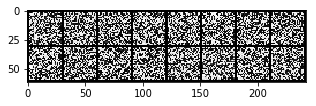

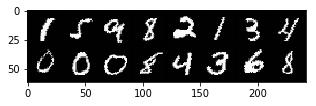


  0%|          | 19/10001 [00:02<26:01,  6.39it/s]
Exception in thread Thread-23:
Traceback (most recent call last):
  File "/Users/sunxiaofei/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/sunxiaofei/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

 10%|▉         | 1000/10001 [01:41<15:17,  9.81it/s]

-1.0
-0.9999998807907104
torch.Size([3, 62, 242])


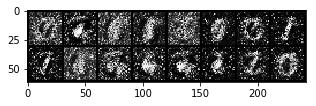

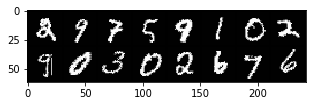

 20%|█▉        | 2000/10001 [03:28<13:52,  9.61it/s]

-1.0
-1.0
torch.Size([3, 62, 242])


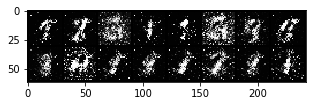

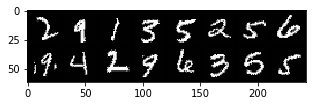

 30%|██▉       | 3000/10001 [05:11<12:06,  9.63it/s]

-1.0
-1.0
torch.Size([3, 62, 242])


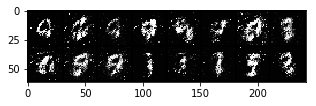

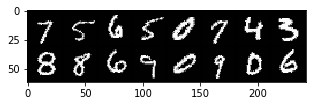

 40%|███▉      | 4000/10001 [06:57<10:26,  9.58it/s]

-1.0
-1.0
torch.Size([3, 62, 242])


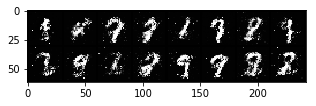

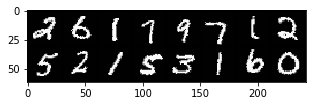

 50%|████▉     | 5000/10001 [08:46<08:47,  9.49it/s]

-1.0
-1.0
torch.Size([3, 62, 242])


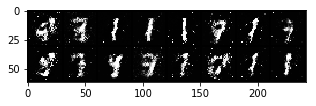

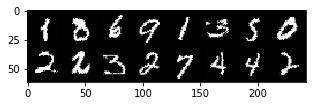

 60%|█████▉    | 6000/10001 [10:26<06:57,  9.58it/s]

-1.0
-1.0
torch.Size([3, 62, 242])


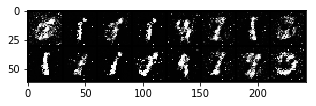

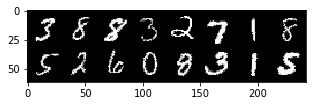

 60%|██████    | 6014/10001 [10:28<06:56,  9.57it/s]


KeyboardInterrupt: 

In [131]:
from tqdm import tqdm
G = Generator()
D = Discriminator()
G_lr = D_lr = 0.0002
optimizers = {
    'D': torch.optim.Adam(D.parameters(), lr=D_lr, betas=(0.5, 0.999)),
    'G': torch.optim.Adam(G.parameters(), lr=G_lr, betas=(0.5, 0.999))
}
criterion = nn.BCELoss()
for epoch in tqdm(range(10000+1)):
    data = next(iter(train_loader))[0]
    ones_label = Variable(torch.ones((data.size()[0], 1)))
    zeros_label = Variable(torch.zeros((data.size()[0], 1)))

    optimizers['D'].zero_grad()
    data = Variable(data)
    output_real = D(data)
    loss_real_G = criterion(output_real, ones_label)

    noisev = torch.randn(data.size()[0], z_size, 1, 1)
    noisev = Variable(noisev)
    fake_data = G(noisev)
    output_fake = D(fake_data)
    loss_fake_G = criterion(output_fake, zeros_label)

    loss_real = loss_real_G + loss_fake_G
    loss_real.backward()
    optimizers['D'].step()

    optimizers['G'].zero_grad()
    noisev = torch.randn(data.size()[0], z_size, 1, 1)
    noisev = Variable(noisev)
    fake_data = G(noisev)
    output_fake1 = D(fake_data)
    loss_fake_G = criterion(output_fake1, ones_label)
    loss_fake_G.backward()
    optimizers['G'].step()
    #     print(data[0])
    #     print('------------')
    #     print(fake_data[0])
    #     break

    if epoch % 1000 == 0:
        print(data.data.min())
        print(fake_data.data.min())
        dd = utils.make_grid(fake_data.data[:16])
        print(dd.size())
        imshow(dd)
        dd = utils.make_grid(data.data[:16])
        imshow(dd)

[[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.        

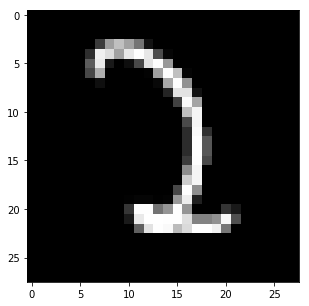

torch.Size([128, 1, 28, 28])
[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [-1. -1. -1.]
  ..., 
  [-1. -1. -1.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [-1. -1. -1.]
  ..., 
  [-1. -1. -1.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


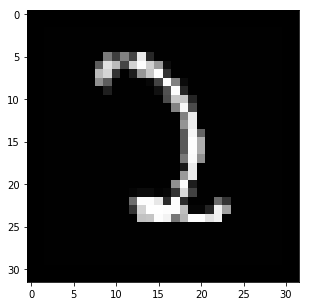

In [175]:
data = next(iter(train_loader))
a=data[0][0].view((28,28)).numpy()
print(a)
fig = plt.figure(figsize=(5, 5))
plt.imshow(a,cmap='gray')
plt.show()
data = Variable(data[0])
print(data.size())
dd = utils.make_grid(data.data[:1])
imshow(dd)